This lab session in an introduction to feed-forward neural network with pytorch. We use the dataset Fashion-MNIST (see for more details this website https://github.com/zalandoresearch/fashion-mnist). The dataset contains 60000 and 10000 images for respectively training and testing. Each image is 28x28 pixels, for a total of 784 per image.  An image is presented to the neural network as a flat vector of 784 component. 


In this lab session, you will experiment different kind of feed-forward networks, starting with simple models,  and then increasing their complexity. 

First load and test python and pytorch. Your notebook is supposed to work with python 3 (see the top right corner of the notebook).



In [6]:
import torch as th
print(th.__version__) # should be greater or equal to 1.0
import torch.nn as nn

import os

import numpy as np
import pickle
import math
import matplotlib
import matplotlib.pyplot as plt 

import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_formats=['svg']
%config InlineBackend.figure_format = 'svg'

1.7.1


On a mis les fonctions utiles dans utils

In [21]:
os.chdir('C:\\Users\\sedra\\IDL\\PROJET METROPOLIS')
from utils import * # les fonctions utiles

# Dataset

Les données sont générées via l'algorithme XY_metropolis sur Matlab.

En sortie de Matlab : N cartes de spins (32x32) au format png, dans deux fichiers distincts selon la charge topologique totale (nulle : 'spin_first_0' ou non : 'spin_first_1').

Ces images sont collectées ici, transformées en numpy array puis en tenseur. 

In [111]:
os.chdir('C:\\Users\\sedra\\IDL\\PROJET METROPOLIS\\spin_first\\spin_first_0')
os.getcwd()

'C:\\Users\\sedra\\IDL\\PROJET METROPOLIS\\spin_first\\spin_first_0'

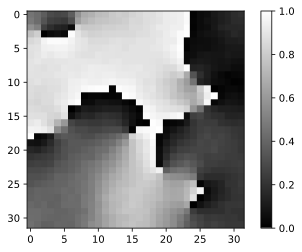

In [11]:

  
# Read Images 
img = mpimg.imread('spin_7.png') 
  
# Output Images 
plt.imshow(img,'gray') 
plt.colorbar()

Sur l'image ci dessus, on observe des discontinuités forte entre des zones à 0 et des zones à 1. C'est le passage de 2pi à 0 pour l'angle du spin.

### Array into tensor


On lance deux fois, en changeant de folder... Xtrain fait est donc de size 2N (on change Ytrain de 0 à 1)

In [82]:
allXtrain=[]
allYtrain=[]

In [88]:
for i in range(1,2001):
    try :
        img = mpimg.imread('spin_{}.png'.format(i)) 
        allXtrain.append(img.reshape(1,1024))
        allYtrain.append(1)
    except :
        print('spin_{} a une charge topo nulle malgré le crop'.format(i))

spin_91 a une charge topo nulle malgré le crop
spin_283 a une charge topo nulle malgré le crop
spin_375 a une charge topo nulle malgré le crop
spin_501 a une charge topo nulle malgré le crop
spin_580 a une charge topo nulle malgré le crop
spin_587 a une charge topo nulle malgré le crop
spin_638 a une charge topo nulle malgré le crop
spin_639 a une charge topo nulle malgré le crop
spin_715 a une charge topo nulle malgré le crop
spin_749 a une charge topo nulle malgré le crop
spin_899 a une charge topo nulle malgré le crop
spin_1214 a une charge topo nulle malgré le crop
spin_1343 a une charge topo nulle malgré le crop
spin_1525 a une charge topo nulle malgré le crop
spin_1725 a une charge topo nulle malgré le crop
spin_1903 a une charge topo nulle malgré le crop


In [11]:
Xtrain=th.cat([th.from_numpy(np.array(allXtrain[:1500])),th.from_numpy(np.array(allXtrain[2500:]))])
Ytrain=th.cat([th.from_numpy(np.array(allYtrain[:1500])),th.from_numpy(np.array(allYtrain[2500:]))])

Xvalid=th.from_numpy(np.array(allXtrain[1500:2500]))
Yvalid=th.from_numpy(np.array(allYtrain[1500:2500]))

Ztrain=th.squeeze(Xtrain,1)
Zvalid=th.squeeze(Xvalid,1)

Ytrain=Ytrain.long()
Yvalid=Yvalid.long()

# Feed forward neural network


In [15]:
D_in = 1024
D_out= 2

## 
model = nn.Sequential(
        nn.Linear(D_in,D_out),
        nn.LogSoftmax(dim=1) #on lui donne un tenseur et il normalise se
    )
loss_function = nn.NLLLoss()


Ci dessus : X(image) ==> a= W@X + b (avec W:784x10 et b:10)

Or P(y/x)= exp(ay)/Somme(exp(ay')) ==> on prend le log de ca

Si on connait c, on veux minimiser "-log(P(y=c/x)" C'est bien la NLL qu'on veut prendre.

En effet : la NLL prend en entrée (log proba, réponse)


In [117]:
B=3
i = 2500
pred = model(Ztrain[i:i+B])
print(pred)


tensor([[ -2.6573,  -0.0727, -47.1855, -46.8546, -47.2462, -47.1259, -47.3502,
         -47.0964, -47.3073, -46.7089],
        [ -1.4490,  -0.2676, -43.8207, -44.2818, -43.6075, -43.6888, -43.4413,
         -43.6659, -43.6963, -43.3702],
        [ -0.7447,  -0.6442, -38.7641, -38.6726, -38.5250, -38.5885, -38.5901,
         -38.8570, -38.5738, -38.9162]], grad_fn=<LogSoftmaxBackward>)


Crochet en trop sur pred ?

In [27]:
B=1
i = 1
pred = model(Ztrain[i:i+B])
loss = loss_function(pred,Ytrain[i:i+B]) 
print(loss)

tensor(0.9551, grad_fn=<NllLossBackward>)


## Online learning  and mini-batch

We will use the Adam optimizer with an initial learning rate of 0.001. Read, modify the following code. 



In [16]:
epochs=60

### The model, the loss and optimizer
model=nn.Sequential(nn.Linear(D_in,D_out),
                    nn.LogSoftmax(dim=1))
optimizer=th.optim.Adam(model.parameters(),lr=0.001) #ADAM = ADAptative Moment estimation
loss_fn=nn.NLLLoss()

### Mini-batching and shuffle 
Ntrain = Ztrain.shape[0]
Nvalid = Zvalid.shape[0]
print(Ntrain,Nvalid)
idx = np.arange(Ntrain)
batch_size = 50 # Beaucoup plus rapide que 1 ! 
nbatch = int(Ntrain/batch_size)
print(batch_size, nbatch)




train_losses,valid_losses, valid_accuracies=[],[],[]
 

for e in range(epochs):
    np.random.shuffle(idx)
    running_loss=0
    totaln = 0
    for bi in range(nbatch): #on calcule la loss sur un gros paquet d'images !
        ids = idx[bi*batch_size:(bi+1)*batch_size]
        images = Ztrain[ids]
        labels = Ytrain[ids]
        totaln += labels.shape[0] # the number of samples
        optimizer.zero_grad()
        logprobs=model(images)
        loss=loss_fn(logprobs,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    # training is over for one epoch
    # now compute interesting quantities
    accuracy=0
    valid_loss = 0        
    with th.no_grad(): #on test le model sur le set de VALIDITE
        images = Zvalid
        labels = Yvalid
        logprobs=model(images)
        valid_loss=loss_fn(logprobs,labels)
        top_p,top_class=logprobs.topk(1)
        accuracy=(top_class.T == labels).sum().float()
    train_losses.append(running_loss/nbatch)
    valid_losses.append(valid_loss)
    valid_accuracies.append(accuracy.item()*100.0/Nvalid)
    print("Epoch: {}\t".format(e+1),
              "train Loss: {:.5f}.. ".format(train_losses[-1]),
              "valid Loss: {:.5f}.. ".format(valid_losses[-1]),
              "valid Accuracy: {:.3f}".format(valid_accuracies[-1]))  
print("---------- Best : {:.3f}".format(max(valid_accuracies)), " at epoch " 
      , np.fromiter(valid_accuracies, dtype=np.float).argmax(), " / ",epochs )


2984 1000
50 59
Epoch: 1	 train Loss: 0.71215..  valid Loss: 0.75358..  valid Accuracy: 50.000
Epoch: 2	 train Loss: 0.70841..  valid Loss: 0.75262..  valid Accuracy: 49.800
Epoch: 3	 train Loss: 0.69926..  valid Loss: 0.71540..  valid Accuracy: 50.700
Epoch: 4	 train Loss: 0.68701..  valid Loss: 0.70387..  valid Accuracy: 47.100
Epoch: 5	 train Loss: 0.68729..  valid Loss: 0.70752..  valid Accuracy: 51.600
Epoch: 6	 train Loss: 0.67533..  valid Loss: 0.70413..  valid Accuracy: 48.500
Epoch: 7	 train Loss: 0.68093..  valid Loss: 0.71615..  valid Accuracy: 49.800
Epoch: 8	 train Loss: 0.67011..  valid Loss: 0.78544..  valid Accuracy: 49.800
Epoch: 9	 train Loss: 0.68241..  valid Loss: 0.71163..  valid Accuracy: 48.900
Epoch: 10	 train Loss: 0.67010..  valid Loss: 0.70946..  valid Accuracy: 48.100
Epoch: 11	 train Loss: 0.67145..  valid Loss: 0.72391..  valid Accuracy: 50.700
Epoch: 12	 train Loss: 0.66714..  valid Loss: 0.71082..  valid Accuracy: 48.200
Epoch: 13	 train Loss: 0.65923.. 

Run the training loop with a batch size of 1 and then of size 200. The difference in terms of computation time should be significant ! We will now only use a batch size of 200. 

Note that in practice, the learning rate should be adapted to the mini-batch size. 

Run the previous training code with a batch size of 200 for 30 epochs. We can plot at the results like this


(0.0, 51.875)

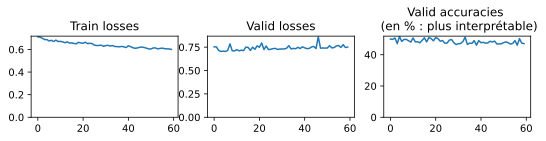

In [17]:
plt.figure(figsize = (9, 1.5))
ax= plt.subplot(1, 3, 1)
plt.plot(train_losses)
plt.title('Train losses')
ax.set_ylim(bottom=0)
ax= plt.subplot(1, 3, 2)
plt.plot(valid_losses)
plt.title('Valid losses')

ax.set_ylim(bottom=0)
ax= plt.subplot(1, 3, 3)
plt.plot(valid_accuracies)
plt.title('Valid accuracies \n (en % : plus interprétable)')

ax.set_ylim(bottom=0)

2984 1000
100 29
---------- Best : 51.800  at epoch  0  /  30


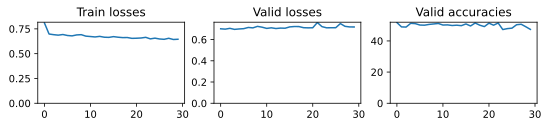

In [39]:
def train(model, epochs=30,verbose=False):
    # The verbose allows you to skip printed information per epoch.
    # The function will only print the best accuracy on the validation
    # and plot the learning curves. 
    
    ### Mini-batching and shuffle 
    Ntrain = Ztrain.shape[0]
    Nvalid = Zvalid.shape[0]
    print(Ntrain,Nvalid)
    idx = np.arange(Ntrain)
    batch_size = 100 # Beaucoup plus rapide que 1 ! 
    nbatch = int(Ntrain/batch_size)
    print(batch_size, nbatch)


    train_losses,valid_losses, valid_accuracies=[],[],[]


    for e in range(epochs):
        np.random.shuffle(idx)
        running_loss=0
        totaln = 0
        for bi in range(nbatch): #on calcule la loss sur un gros paquet d'images !
            ids = idx[bi*batch_size:(bi+1)*batch_size]
            images = Ztrain[ids]
            labels = Ytrain[ids]
            totaln += labels.shape[0] # the number of samples
            optimizer.zero_grad()
            logprobs=model(images)
            loss=loss_fn(logprobs,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
        # training is over for one epoch
        # now compute interesting quantities
        accuracy=0
        valid_loss = 0        
        with th.no_grad(): # On est plus entrain d'apprendre, plus de gradient
            model.eval()
            images = Zvalid
            labels = Yvalid
            logprobs=model(images)
            valid_loss=loss_fn(logprobs,labels)
            top_p,top_class=logprobs.topk(1)
            accuracy=(top_class.T == labels).sum().float()
        model.train()
        train_losses.append(running_loss/nbatch)
        valid_losses.append(valid_loss)
        valid_accuracies.append(accuracy.item()*100.0/Nvalid)
        '''
        print("Epoch: {}\t".format(e+1),
                  "train Loss: {:.5f}.. ".format(train_losses[-1]),
                  "valid Loss: {:.5f}.. ".format(valid_losses[-1]),
                  "valid Accuracy: {:.3f}".format(valid_accuracies[-1])) 
        '''
    print("---------- Best : {:.3f}".format(max(valid_accuracies)), " at epoch " 
          , np.fromiter(valid_accuracies, dtype=np.float).argmax(), " / ",epochs )
    
    plt.figure(figsize = (9, 1.5))
    ax= plt.subplot(1, 3, 1)
    plt.plot(train_losses)
    plt.title('Train losses')
    ax.set_ylim(bottom=0)
    ax= plt.subplot(1, 3, 2)
    plt.plot(valid_losses)
    plt.title('Valid losses')
    ax.set_ylim(bottom=0)
    ax= plt.subplot(1, 3, 3)
    plt.plot(valid_accuracies)
    plt.title('Valid accuracies')
    ax.set_ylim(bottom=0)
    
    return



# When we create the model, its parameters are initialized. 
model=nn.Sequential(nn.Linear(D_in,D_out),
                    nn.LogSoftmax(dim=1))
optimizer=th.optim.Adam(model.parameters(),lr=0.001)
# Note this important to build a new optimizer 
# if we want to have the reference to parameters 
# of the new model ! 
train(model)

On stagne aux alentours de 50% pour l'accuracy sur le set de validité, raisons possibles : 

- Modèle trop simple
- Pas assez de data (peu probable vu les courbes...)
- Carte de spin (de 0 à 1) en entrée trop compliquée ?

## Un modèle plus complexe

2984 1000
50 59
---------- Best : 51.200  at epoch  86  /  100


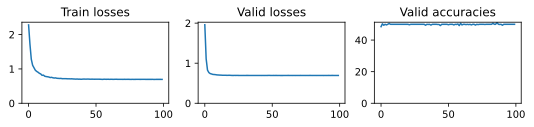

In [28]:
hidden_layer = 50
D_in = 1024
D_out= 10

model_best = th.nn.Sequential(
    th.nn.Linear(D_in, hidden_layer),
    th.nn.ReLU(),
    th.nn.Dropout(0.5),
    th.nn.Linear(hidden_layer,hidden_layer),
    th.nn.ReLU(),
    th.nn.Dropout(0.5),
    th.nn.Linear(hidden_layer,D_out),
    nn.LogSoftmax(dim=1)
)
optimizer=th.optim.Adam(model_best.parameters(),lr=0.0001)

train(model_best,100)

On a toujours 50% d'erreur. On pourrait utiliser un réseau convolutif dès maintenant, mais on va essayer de mettre en entrée du réseau de neurones qqchose de plus interessant : 

- la concaténation du cosinus et du sinus de la matrice de spin, remise entre 0 et 2pi (on passe de 1024 à 2048) 

## Changing dataset

In [94]:
allXtrain2=allXtrain

In [90]:
pi=math.pi

In [95]:
for i in range(len(allXtrain)):
    allXtrain2[i]=np.concatenate([np.cos(2*pi*allXtrain[i]),np.sin(2*pi*allXtrain[i])],axis=1)

In [104]:
allXtrain[i].shape

(1, 2048)

In [98]:
allXtrain2[20].shape

(1, 2048)

In [105]:
Xtrain2=th.cat([th.from_numpy(np.array(allXtrain[:1500])),th.from_numpy(np.array(allXtrain[2500:]))])
Ytrain2=th.cat([th.from_numpy(np.array(allYtrain[:1500])),th.from_numpy(np.array(allYtrain[2500:]))])

Xvalid2=th.from_numpy(np.array(allXtrain[1500:2500]))
Yvalid2=th.from_numpy(np.array(allYtrain[1500:2500]))

In [106]:
Ztrain2=th.squeeze(Xtrain2,1)
Zvalid2=th.squeeze(Xvalid2,1)
Ytrain2=Ytrain2.long()
Yvalid2=Yvalid2.long()

In [107]:
Ztrain2.shape

torch.Size([2984, 2048])

2984 1000
100 29
---------- Best : 53.700  at epoch  9  /  30


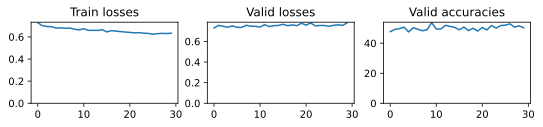

In [108]:
def train2(model, epochs=30,verbose=False):
    # The verbose allows you to skip printed information per epoch.
    # The function will only print the best accuracy on the validation
    # and plot the learning curves. 
    
    ### Mini-batching and shuffle 
    Ntrain = Ztrain2.shape[0]
    Nvalid = Zvalid2.shape[0]
    print(Ntrain,Nvalid)
    idx = np.arange(Ntrain)
    batch_size = 100 # Beaucoup plus rapide que 1 ! 
    nbatch = int(Ntrain/batch_size)
    print(batch_size, nbatch)


    train_losses,valid_losses, valid_accuracies=[],[],[]


    for e in range(epochs):
        np.random.shuffle(idx)
        running_loss=0
        totaln = 0
        for bi in range(nbatch): #on calcule la loss sur un gros paquet d'images !
            ids = idx[bi*batch_size:(bi+1)*batch_size]
            images = Ztrain2[ids]
            labels = Ytrain2[ids]
            totaln += labels.shape[0] # the number of samples
            optimizer.zero_grad()
            logprobs=model(images)
            loss=loss_fn(logprobs,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
        # training is over for one epoch
        # now compute interesting quantities
        accuracy=0
        valid_loss = 0        
        with th.no_grad(): # On est plus entrain d'apprendre, plus de gradient
            model.eval()
            images = Zvalid2
            labels = Yvalid2
            logprobs=model(images)
            valid_loss=loss_fn(logprobs,labels)
            top_p,top_class=logprobs.topk(1)
            accuracy=(top_class.T == labels).sum().float()
        model.train()
        train_losses.append(running_loss/nbatch)
        valid_losses.append(valid_loss)
        valid_accuracies.append(accuracy.item()*100.0/Nvalid)
        '''
        print("Epoch: {}\t".format(e+1),
                  "train Loss: {:.5f}.. ".format(train_losses[-1]),
                  "valid Loss: {:.5f}.. ".format(valid_losses[-1]),
                  "valid Accuracy: {:.3f}".format(valid_accuracies[-1])) 
        '''
    print("---------- Best : {:.3f}".format(max(valid_accuracies)), " at epoch " 
          , np.fromiter(valid_accuracies, dtype=np.float).argmax(), " / ",epochs )
    
    plt.figure(figsize = (9, 1.5))
    ax= plt.subplot(1, 3, 1)
    plt.plot(train_losses)
    plt.title('Train losses')
    ax.set_ylim(bottom=0)
    ax= plt.subplot(1, 3, 2)
    plt.plot(valid_losses)
    plt.title('Valid losses')
    ax.set_ylim(bottom=0)
    ax= plt.subplot(1, 3, 3)
    plt.plot(valid_accuracies)
    plt.title('Valid accuracies')
    ax.set_ylim(bottom=0)
    
    return


D_in=2048
D_out=2

# When we create the model, its parameters are initialized. 
model=nn.Sequential(nn.Linear(D_in,D_out),
                    nn.LogSoftmax(dim=1))
optimizer=th.optim.Adam(model.parameters(),lr=0.001)
# Note this important to build a new optimizer 
# if we want to have the reference to parameters 
# of the new model ! 
train2(model)

# Convolution

In [186]:
allXtrain=[]
allYtrain=[]

In [189]:
os.chdir('C:\\Users\\sedra\\IDL\\PROJET METROPOLIS\\spin_first\\spin_first_1')
os.getcwd()

'C:\\Users\\sedra\\IDL\\PROJET METROPOLIS\\spin_first\\spin_first_1'

In [190]:
for i in range(1,4001):
    try :
        img = mpimg.imread('spin_{}.png'.format(i)) 
        allXtrain.append(img)
        allYtrain.append(1)
    except :
        print('spin_{} a une charge topo nulle malgré le crop'.format(i))

spin_91 a une charge topo nulle malgré le crop
spin_283 a une charge topo nulle malgré le crop
spin_375 a une charge topo nulle malgré le crop
spin_501 a une charge topo nulle malgré le crop
spin_580 a une charge topo nulle malgré le crop
spin_587 a une charge topo nulle malgré le crop
spin_638 a une charge topo nulle malgré le crop
spin_639 a une charge topo nulle malgré le crop
spin_715 a une charge topo nulle malgré le crop
spin_749 a une charge topo nulle malgré le crop
spin_899 a une charge topo nulle malgré le crop
spin_1214 a une charge topo nulle malgré le crop
spin_1343 a une charge topo nulle malgré le crop
spin_1525 a une charge topo nulle malgré le crop
spin_1725 a une charge topo nulle malgré le crop
spin_1903 a une charge topo nulle malgré le crop
spin_2048 a une charge topo nulle malgré le crop
spin_2102 a une charge topo nulle malgré le crop
spin_2172 a une charge topo nulle malgré le crop
spin_2179 a une charge topo nulle malgré le crop
spin_2296 a une charge topo null

In [191]:
allXtrain_array=np.array(allXtrain)

In [193]:
allXtrain_array.shape

(7963, 32, 32)

In [194]:
allXtrain_f=allXtrain_array.reshape(7963, 1, 32, 32)

In [195]:
Xtrain=th.cat([th.from_numpy(np.array(allXtrain_f[:3500,:,:,:])),th.from_numpy(np.array(allXtrain_f[4500:,:,:,:]))])
Ytrain=th.cat([th.from_numpy(np.array(allYtrain[:3500])),th.from_numpy(np.array(allYtrain[4500:]))])

Xvalid=th.from_numpy(np.array(allXtrain_f[3500:4500,:,:,:]))
Yvalid=th.from_numpy(np.array(allYtrain[3500:4500]))

Ytrain=Ytrain.long()
Yvalid=Yvalid.long()

image.size() = [100, 1, 32, 32] = [batch_size, number of channels (3 si RGB), dim_X, dim_Y]

In [196]:
import torch.nn.functional as F

In [217]:
class Conv2d_classifier(nn.Module):   
    def __init__(self):
        super(Conv2d_classifier, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5) # 1-grayscale ; 2-nbr sorties ; 3-kernel size
        self.pool = nn.AvgPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120) #conv1-pool-conv2-pool
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,2) #2-classif binaire
        self.dropout = nn.Dropout(0.3) 

    # Defining the forward pass    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5) #-1- batch size #flatten it 
        x = F.relu(self.fc1(x))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        # softmax ? or is it in the loss
        return x

In [198]:
# How to get fc1 input dimension
conv1 = nn.Conv2d(1,6,5)
pool = nn.MaxPool2d(2,2)
conv2 = nn.Conv2d(6,16,5)

sortie=pool(F.relu(conv2(pool(F.relu(conv1(images))))))

print(sortie.shape)

fc1 = nn.Linear(16*5*5,50)
fc2 = nn.Linear(50,50)
fc3 = nn.Linear(50,2)

x=sortie
print(x.shape)
x=x.view(-1,16*5*5)
print(x.shape)
x = F.relu(fc1(x))
print(x.shape)
x = F.relu(fc2(x))
print(x.shape)
x = fc3(x)
print(x.shape)


torch.Size([1000, 16, 5, 5])
torch.Size([1000, 16, 5, 5])
torch.Size([1000, 400])
torch.Size([1000, 50])
torch.Size([1000, 50])
torch.Size([1000, 2])


In [220]:
classif = Conv2d_classifier()
loss_fn = nn.CrossEntropyLoss()
optimizer = th.optim.Adam(classif.parameters(), lr=0.001)

6963 1000
100 69
tensor(0.6932)
tensor(500.)
tensor(0.6930)
tensor(513.)
tensor(0.6933)
tensor(502.)
tensor(0.6932)
tensor(508.)
tensor(0.6929)
tensor(515.)
tensor(0.6991)
tensor(516.)
tensor(0.6939)
tensor(514.)
tensor(0.6916)
tensor(539.)
tensor(0.7064)
tensor(536.)
tensor(0.6975)
tensor(556.)
tensor(0.7122)
tensor(525.)
tensor(0.7540)
tensor(550.)
tensor(0.7618)
tensor(539.)
tensor(0.8062)
tensor(556.)
tensor(0.8581)
tensor(588.)
tensor(0.8872)
tensor(589.)
tensor(0.9611)
tensor(604.)
tensor(1.0629)
tensor(631.)
tensor(1.1883)
tensor(652.)
tensor(1.3440)
tensor(660.)
tensor(1.4611)
tensor(665.)
tensor(1.5573)
tensor(658.)
tensor(1.8672)
tensor(658.)
tensor(1.7236)
tensor(687.)
tensor(1.8546)
tensor(687.)
tensor(1.9480)
tensor(680.)
tensor(2.0750)
tensor(694.)
tensor(2.2257)
tensor(686.)
tensor(2.2986)
tensor(673.)
tensor(2.3565)
tensor(692.)
---------- Best : 69.400  at epoch  26  /  30


(0.0, 70.37)

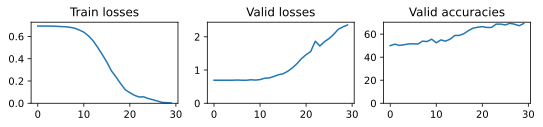

In [221]:
#def train_conv(model, epochs=30,verbose=False):
    # The verbose allows you to skip printed information per epoch.
    # The function will only print the best accuracy on the validation
    # and plot the learning curves. 
    
    ### Mini-batching and shuffle 

epochs = 30

Ntrain = Xtrain.shape[0]
Nvalid = Xvalid.shape[0]
print(Ntrain,Nvalid)
idx = np.arange(Ntrain)
batch_size = 100 # Beaucoup plus rapide que 1 ! 
nbatch = int(Ntrain/batch_size)
print(batch_size, nbatch)


train_losses,valid_losses, valid_accuracies=[],[],[]


for e in range(epochs):
    np.random.shuffle(idx)
    running_loss=0
    totaln = 0
    for bi in range(nbatch): #on calcule la loss sur un gros paquet d'images !
        ids = idx[bi*batch_size:(bi+1)*batch_size]
        images = Xtrain[ids]
        labels = Ytrain[ids]
        totaln += labels.shape[0] # the number of samples
        optimizer.zero_grad()
        logprobs=classif(images)
        loss=loss_fn(logprobs,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    # training is over for one epoch
    # now compute interesting quantities
    accuracy=0
    valid_loss = 0        
    with th.no_grad(): # On est plus entrain d'apprendre, plus de gradient
        classif.eval()
        images = Xvalid
        labels = Yvalid
        logprobs=classif(images)
        valid_loss=loss_fn(logprobs,labels)
        top_p,top_class=logprobs.topk(1) #comment l'accuracy est elle calculé sur le set de valid ??
        accuracy=(top_class.T == labels).sum().float()
    classif.train()
    train_losses.append(running_loss/nbatch)
    valid_losses.append(valid_loss)
    valid_accuracies.append(accuracy.item()*100.0/Nvalid)
    '''
    print("Epoch: {}\t".format(e+1),
              "train Loss: {:.5f}.. ".format(train_losses[-1]),
              "valid Loss: {:.5f}.. ".format(valid_losses[-1]),
              "valid Accuracy: {:.3f}".format(valid_accuracies[-1])) 
    '''
print("---------- Best : {:.3f}".format(max(valid_accuracies)), " at epoch " 
      , np.fromiter(valid_accuracies, dtype=np.float).argmax(), " / ",epochs )

plt.figure(figsize = (9, 1.5))
ax= plt.subplot(1, 3, 1)
plt.plot(train_losses)
plt.title('Train losses')
ax.set_ylim(bottom=0)
ax= plt.subplot(1, 3, 2)
plt.plot(valid_losses)
plt.title('Valid losses')
ax.set_ylim(bottom=0)
ax= plt.subplot(1, 3, 3)
plt.plot(valid_accuracies)
plt.title('Valid accuracies')
ax.set_ylim(bottom=0)
    
#    return
